In [78]:
import pandas as pd
import numpy as np

In [79]:
up1 = pd.read_csv('./trajectory/up1.csv')
up2 = pd.read_csv('./trajectory/up2.csv')
right1 = pd.read_csv('./trajectory/right1.csv')
right2 = pd.read_csv('./trajectory/right2.csv')
down1 = pd.read_csv('./trajectory/down1.csv')
down2 = pd.read_csv('./trajectory/down2.csv')

up1 = np.array(up1)
up2 = np.array(up2)
right1 = np.array(right1)
right2 = np.array(right2)
down1 = np.array(down1)
down2 = np.array(down2)

In [80]:
up1 = up1.reshape(len(up1), 3)
up2 = up2.reshape(len(up2), 3)
right1 = right1.reshape(len(right1), 3)
right2 = right2.reshape(len(right2), 3)
down1 = down1.reshape(len(down1), 3)
down2 = down2.reshape(len(down2), 3)

In [81]:
seq = np.vstack([up1, up2])
seq = np.append(seq, right1, axis=0)
seq = np.append(seq, right2, axis=0)
seq = np.append(seq, down1, axis=0)
seq = np.append(seq, down1, axis=0)
seq.shape

(210, 3)

In [82]:
x_max = max(seq[:,0])
x_min = min(seq[:,0])
y_max = max(seq[:,1])
y_min = min(seq[:,1])
z_max = max(seq[:,2])
z_min = min(seq[:,2])
print(x_min, x_max, y_min, y_max, z_min, z_max)

66.4967 95.4134 -15.1893 278.767 1.4344700000000001 58.4673


In [83]:
seq = seq.reshape(6, 35, 3)
seq

array([[[ 80.081    , 278.725    ,  51.5481   ],
        [ 79.809    , 268.847    ,  53.0291   ],
        [ 79.538    , 257.158    ,  54.7825   ],
        [ 79.2844   , 245.89     ,  55.9122   ],
        [ 78.8713   , 239.182    ,  56.0064   ],
        [ 78.4739   , 232.452    ,  55.5936   ],
        [ 78.259    , 218.466    ,  56.5888   ],
        [ 77.8914   , 208.481    ,  55.9948   ],
        [ 77.5442   , 200.509    ,  54.8337   ],
        [ 77.3829   , 189.691    ,  54.3085   ],
        [ 77.0679   , 180.679    ,  52.9485   ],
        [ 76.7701   , 171.867    ,  51.232    ],
        [ 76.648    , 162.067    ,  49.7529   ],
        [ 76.5374   , 152.249    ,  47.2838   ],
        [ 76.2805   , 144.166    ,  44.7854   ],
        [ 75.8809   , 138.212    ,  40.8821   ],
        [ 75.812    , 128.027    ,  38.242    ],
        [ 75.5966   , 120.273    ,  34.8816   ],
        [ 75.3965   , 112.388    ,  30.8262   ],
        [ 75.2178   , 103.768    ,  27.0571   ],
        [ 75.1927   

In [84]:
tmp = np.zeros((6,35,3))

In [85]:
for i in range(seq.shape[0]):
    for j in range(seq.shape[1]):
        tmp[i,j,0] = (seq[i,j,0]-x_min)/(x_max-x_min)
        tmp[i,j,1] = (seq[i,j,1]-y_min)/(y_max-y_min)
        tmp[i,j,2] = (seq[i,j,2]-z_min)/(z_max-z_min)
        
tmp

array([[[0.46977352, 0.99985712, 0.8786804 ],
        [0.46036719, 0.96625349, 0.9046479 ],
        [0.45099545, 0.92648907, 0.9353916 ],
        [0.44222543, 0.88815685, 0.95519949],
        [0.42793956, 0.86533713, 0.95685117],
        [0.41419664, 0.84244257, 0.94961323],
        [0.40676495, 0.79486407, 0.96706283],
        [0.39405257, 0.76089643, 0.95664778],
        [0.38204567, 0.73377676, 0.93628933],
        [0.37646758, 0.69697537, 0.9270806 ],
        [0.36557422, 0.66631775, 0.90323468],
        [0.35527567, 0.6363405 , 0.87313798],
        [0.3510532 , 0.60300221, 0.84720379],
        [0.34722842, 0.56960269, 0.80391119],
        [0.33834428, 0.54210541, 0.76010484],
        [0.32452527, 0.5218507 , 0.69166531],
        [0.32214257, 0.48720269, 0.64537443],
        [0.31469359, 0.46082462, 0.58645398],
        [0.30777371, 0.4340009 , 0.51534756],
        [0.30159389, 0.40467682, 0.44926107],
        [0.30072588, 0.37262954, 0.3805936 ],
        [0.29531032, 0.34523091, 0

In [86]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

In [87]:
hidden_layer = 256
n_step = 35
features = 3

In [88]:
model = Sequential()
model.add(LSTM(hidden_layer, activation='relu', input_shape=(n_step, features)))
model.add(RepeatVector(n_step))
model.add(LSTM(hidden_layer, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(3)))

In [89]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               266240    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 35, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 35, 256)           525312    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 35, 3)             771       
Total params: 792,323
Trainable params: 792,323
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [91]:
model.fit(tmp, tmp, batch_size=3, epochs=600)

Epoch 1/600
6/6 [==============================] - 1s 138ms/step - loss: 0.2679 - acc: 0.3762
Epoch 2/600
6/6 [==============================] - 0s 17ms/step - loss: 0.2269 - acc: 0.6714
Epoch 3/600
6/6 [==============================] - 0s 17ms/step - loss: 0.1715 - acc: 0.6714
Epoch 4/600
6/6 [==============================] - 0s 17ms/step - loss: 0.1607 - acc: 0.6714
Epoch 5/600
6/6 [==============================] - 0s 16ms/step - loss: 0.1164 - acc: 0.6714
Epoch 6/600
6/6 [==============================] - 0s 16ms/step - loss: 0.1191 - acc: 0.6714
Epoch 7/600
6/6 [==============================] - 0s 17ms/step - loss: 0.1243 - acc: 0.6714
Epoch 8/600
6/6 [==============================] - 0s 16ms/step - loss: 0.1211 - acc: 0.6714
Epoch 9/600
6/6 [==============================] - 0s 16ms/step - loss: 0.1111 - acc: 0.6714
Epoch 10/600
6/6 [==============================] - 0s 17ms/step - loss: 0.1013 - acc: 0.6714
Epoch 11/600
6/6 [==============================] - 0s 17ms/step - l

6/6 [==============================] - 0s 16ms/step - loss: 0.0058 - acc: 0.8714
Epoch 89/600
6/6 [==============================] - 0s 17ms/step - loss: 0.0041 - acc: 0.8667
Epoch 90/600
6/6 [==============================] - 0s 15ms/step - loss: 0.0046 - acc: 0.8571
Epoch 91/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0038 - acc: 0.8857
Epoch 92/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0035 - acc: 0.8619
Epoch 93/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0027 - acc: 0.8810
Epoch 94/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0027 - acc: 0.8714
Epoch 95/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0022 - acc: 0.9095
Epoch 96/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0023 - acc: 0.8952
Epoch 97/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0022 - acc: 0.9095
Epoch 98/600
6/6 [==============================] - 0s 17ms/step - loss: 

6/6 [==============================] - 0s 16ms/step - loss: 0.0019 - acc: 0.8952
Epoch 175/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0019 - acc: 0.9190
Epoch 176/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0018 - acc: 0.9095
Epoch 177/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0020 - acc: 0.9286
Epoch 178/600
6/6 [==============================] - 0s 17ms/step - loss: 0.0018 - acc: 0.9190
Epoch 179/600
6/6 [==============================] - 0s 17ms/step - loss: 0.0016 - acc: 0.9238
Epoch 180/600
6/6 [==============================] - 0s 17ms/step - loss: 0.0014 - acc: 0.9143
Epoch 181/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0015 - acc: 0.9238
Epoch 182/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0016 - acc: 0.9143
Epoch 183/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0015 - acc: 0.9095
Epoch 184/600
6/6 [==============================] - 0s 16ms/ste

6/6 [==============================] - 0s 17ms/step - loss: 0.0019 - acc: 0.9190
Epoch 260/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0017 - acc: 0.9048
Epoch 261/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0019 - acc: 0.9143
Epoch 262/600
6/6 [==============================] - 0s 15ms/step - loss: 0.0016 - acc: 0.9143
Epoch 263/600
6/6 [==============================] - 0s 17ms/step - loss: 0.0017 - acc: 0.9286
Epoch 264/600
6/6 [==============================] - 0s 18ms/step - loss: 0.0022 - acc: 0.9000
Epoch 265/600
6/6 [==============================] - 0s 17ms/step - loss: 0.0021 - acc: 0.9190
Epoch 266/600
6/6 [==============================] - 0s 18ms/step - loss: 0.0012 - acc: 0.9190
Epoch 267/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0022 - acc: 0.9095
Epoch 268/600
6/6 [==============================] - 0s 16ms/step - loss: 0.0028 - acc: 0.8952
Epoch 269/600
6/6 [==============================] - 0s 15ms/ste

6/6 [==============================] - 0s 16ms/step - loss: 3.8648e-04 - acc: 0.9238
Epoch 343/600
6/6 [==============================] - 0s 16ms/step - loss: 3.4343e-04 - acc: 0.9429
Epoch 344/600
6/6 [==============================] - 0s 16ms/step - loss: 3.2626e-04 - acc: 0.9619
Epoch 345/600
6/6 [==============================] - 0s 16ms/step - loss: 3.5691e-04 - acc: 0.9429
Epoch 346/600
6/6 [==============================] - 0s 17ms/step - loss: 3.4223e-04 - acc: 0.9333
Epoch 347/600
6/6 [==============================] - 0s 17ms/step - loss: 4.0674e-04 - acc: 0.9619
Epoch 348/600
6/6 [==============================] - 0s 18ms/step - loss: 4.2596e-04 - acc: 0.9714
Epoch 349/600
6/6 [==============================] - 0s 16ms/step - loss: 3.2105e-04 - acc: 0.9667
Epoch 350/600
6/6 [==============================] - 0s 16ms/step - loss: 3.9144e-04 - acc: 0.9429
Epoch 351/600
6/6 [==============================] - 0s 16ms/step - loss: 3.0992e-04 - acc: 0.9429
Epoch 352/600
6/6 [=====

6/6 [==============================] - 0s 18ms/step - loss: 3.5433e-04 - acc: 0.9429
Epoch 426/600
6/6 [==============================] - 0s 17ms/step - loss: 2.8759e-04 - acc: 0.9810
Epoch 427/600
6/6 [==============================] - 0s 17ms/step - loss: 2.7793e-04 - acc: 0.9619
Epoch 428/600
6/6 [==============================] - 0s 16ms/step - loss: 3.2306e-04 - acc: 0.9524
Epoch 429/600
6/6 [==============================] - 0s 17ms/step - loss: 2.9207e-04 - acc: 0.9429
Epoch 430/600
6/6 [==============================] - 0s 17ms/step - loss: 3.4729e-04 - acc: 0.9476
Epoch 431/600
6/6 [==============================] - 0s 16ms/step - loss: 2.6686e-04 - acc: 0.9667
Epoch 432/600
6/6 [==============================] - 0s 17ms/step - loss: 3.3194e-04 - acc: 0.9571
Epoch 433/600
6/6 [==============================] - 0s 16ms/step - loss: 2.7751e-04 - acc: 0.9571
Epoch 434/600
6/6 [==============================] - 0s 17ms/step - loss: 2.7587e-04 - acc: 0.9429
Epoch 435/600
6/6 [=====

6/6 [==============================] - 0s 16ms/step - loss: 2.8142e-04 - acc: 0.9429
Epoch 508/600
6/6 [==============================] - 0s 16ms/step - loss: 3.4372e-04 - acc: 0.9476
Epoch 509/600
6/6 [==============================] - 0s 16ms/step - loss: 2.8956e-04 - acc: 0.9571
Epoch 510/600
6/6 [==============================] - 0s 17ms/step - loss: 3.5632e-04 - acc: 0.9810
Epoch 511/600
6/6 [==============================] - 0s 16ms/step - loss: 3.7816e-04 - acc: 0.9333
Epoch 512/600
6/6 [==============================] - 0s 16ms/step - loss: 3.4335e-04 - acc: 0.9524
Epoch 513/600
6/6 [==============================] - 0s 16ms/step - loss: 3.6677e-04 - acc: 0.9619
Epoch 514/600
6/6 [==============================] - 0s 16ms/step - loss: 4.6022e-04 - acc: 0.9667
Epoch 515/600
6/6 [==============================] - 0s 16ms/step - loss: 4.0332e-04 - acc: 0.9571
Epoch 516/600
6/6 [==============================] - 0s 16ms/step - loss: 4.5553e-04 - acc: 0.9667
Epoch 517/600
6/6 [=====

6/6 [==============================] - 0s 16ms/step - loss: 1.8768e-04 - acc: 0.9667
Epoch 590/600
6/6 [==============================] - 0s 17ms/step - loss: 1.7203e-04 - acc: 0.9810
Epoch 591/600
6/6 [==============================] - 0s 16ms/step - loss: 1.9461e-04 - acc: 0.9619
Epoch 592/600
6/6 [==============================] - 0s 16ms/step - loss: 1.5520e-04 - acc: 0.9619
Epoch 593/600
6/6 [==============================] - 0s 16ms/step - loss: 1.4919e-04 - acc: 0.9714
Epoch 594/600
6/6 [==============================] - 0s 16ms/step - loss: 1.4417e-04 - acc: 0.9619
Epoch 595/600
6/6 [==============================] - 0s 18ms/step - loss: 1.5197e-04 - acc: 0.9619
Epoch 596/600
6/6 [==============================] - 0s 16ms/step - loss: 1.4016e-04 - acc: 0.9762
Epoch 597/600
6/6 [==============================] - 0s 16ms/step - loss: 1.2787e-04 - acc: 0.9714
Epoch 598/600
6/6 [==============================] - 0s 16ms/step - loss: 1.2228e-04 - acc: 0.9667
Epoch 599/600
6/6 [=====

In [92]:
yhat = model.predict(tmp)

In [93]:
pred = yhat
for i in range(yhat.shape[0]):
    for j in range(yhat.shape[1]):
        pred[i,j,0] = pred[i,j,0]*(x_max-x_min)+x_min
        pred[i,j,1] = pred[i,j,1]*(y_max-y_min)+y_min
        pred[i,j,2] = pred[i,j,2]*(z_max-z_min)+z_min
pred

array([[[ 80.27514   , 287.69754   ,  54.56167   ],
        [ 79.83819   , 272.55338   ,  54.469772  ],
        [ 79.55857   , 265.08627   ,  55.667843  ],
        [ 79.14133   , 252.47025   ,  55.970295  ],
        [ 78.763985  , 240.592     ,  56.27371   ],
        [ 78.45609   , 229.76776   ,  56.444263  ],
        [ 78.173645  , 219.44106   ,  56.359352  ],
        [ 77.89067   , 209.29185   ,  55.976482  ],
        [ 77.630775  , 199.40459   ,  55.259747  ],
        [ 77.399635  , 189.62701   ,  54.200855  ],
        [ 77.16465   , 179.84076   ,  52.808487  ],
        [ 76.90982   , 170.1347    ,  51.114944  ],
        [ 76.62554   , 160.63988   ,  49.129456  ],
        [ 76.31014   , 151.09515   ,  46.82969   ],
        [ 75.96409   , 141.53848   ,  44.231762  ],
        [ 75.62363   , 132.34998   ,  41.39479   ],
        [ 75.41204   , 124.21124   ,  38.452953  ],
        [ 75.25096   , 115.98541   ,  35.218204  ],
        [ 75.11098   , 107.573456  ,  31.566664  ],
        [ 74

In [94]:
error = np.zeros((seq.shape[0], seq.shape[1], seq.shape[2]))
for i in range(error.shape[0]):
    for j in range(error.shape[1]):
        for k in range(error.shape[2]):
            error[i,j,k] = seq[i,j,k]-pred[i,j,k]

np.set_printoptions(suppress=True)
error

array([[[ -0.19413885,  -8.97254028,  -3.0135684 ],
        [ -0.02918817,  -3.70637524,  -1.44067234],
        [ -0.02057086,  -7.92827319,  -0.88534286],
        [  0.1430731 ,  -6.58024536,  -0.05809495],
        [  0.10731532,  -1.40999524,  -0.26730834],
        [  0.01780717,   2.68423877,  -0.85066346],
        [  0.08535498,  -0.9750553 ,   0.22944789],
        [  0.00072922,  -0.81085486,   0.01831761],
        [ -0.08657545,   1.10441321,  -0.42604655],
        [ -0.01673531,   0.06398584,   0.10764474],
        [ -0.09674996,   0.83824072,   0.14001306],
        [ -0.13972056,   1.73229541,   0.11705554],
        [  0.02245831,   1.42712268,   0.62344443],
        [  0.22725748,   1.15384619,   0.45411097],
        [  0.31641156,   2.62751733,   0.55363807],
        [  0.25727329,   5.86202441,  -0.51269065],
        [  0.39995929,   3.81575732,  -0.21095334],
        [  0.3456387 ,   4.2875874 ,  -0.3366045 ],
        [  0.28552283,   4.81454419,  -0.74046374],
        [  0

In [95]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## topspin

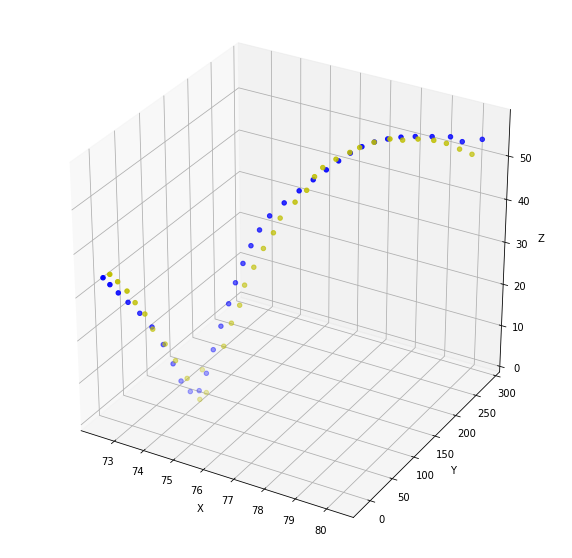

In [96]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_up1 = seq[0,:,:]
pred_up1 = pred[0,:,:]

act_up1_x = act_up1[:, 0]
act_up1_y = act_up1[:, 1]
act_up1_z = act_up1[:, 2]
ax.scatter(act_up1_x, act_up1_y, act_up1_z, c='y')

pred_up1_x = pred_up1[:,0]
pred_up1_y = pred_up1[:,1]
pred_up1_z = pred_up1[:,2]
ax.scatter(pred_up1_x, pred_up1_y, pred_up1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(90,0)
plt.show()

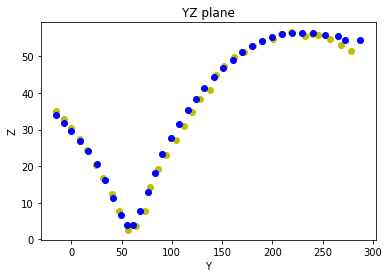

In [97]:
plt.plot(act_up1_y, act_up1_z, 'o', c='y')
plt.plot(pred_up1_y, pred_up1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

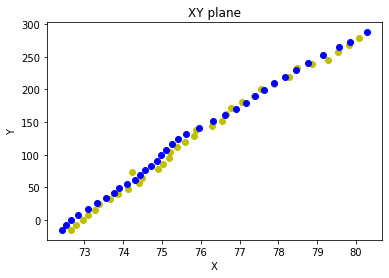

In [98]:
plt.plot(act_up1_x, act_up1_y, 'o', c='y')
plt.plot(pred_up1_x, pred_up1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

## rightspin

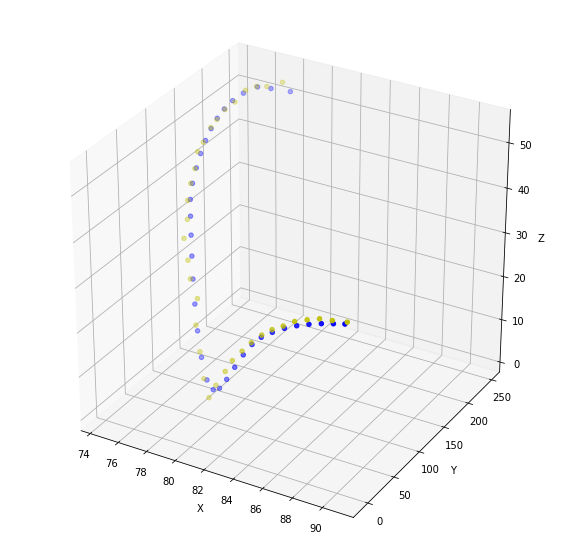

In [99]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_right1 = seq[2,:,:]
pred_right1 = pred[2,:,:]

act_right1_x = act_right1[:, 0]
act_right1_y = act_right1[:, 1]
act_right1_z = act_right1[:, 2]
ax.scatter(act_right1_x, act_right1_y, act_right1_z, c='y')

pred_right1_x = pred_right1[:,0]
pred_right1_y = pred_right1[:,1]
pred_right1_z = pred_right1[:,2]
ax.scatter(pred_right1_x, pred_right1_y, pred_right1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(0,0)
plt.show()

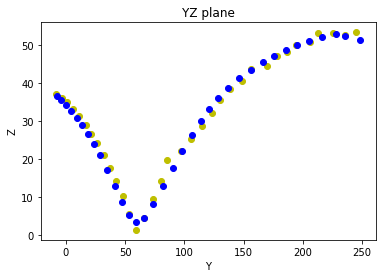

In [100]:
plt.plot(act_right1_y, act_right1_z, 'o', c='y')
plt.plot(pred_right1_y, pred_right1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

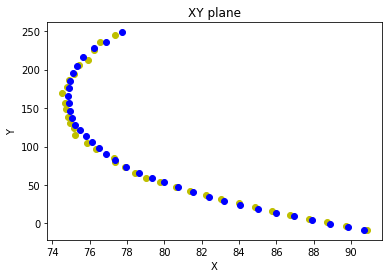

In [101]:
plt.plot(act_right1_x, act_right1_y, 'o', c='y')
plt.plot(pred_right1_x, pred_right1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

## backspin

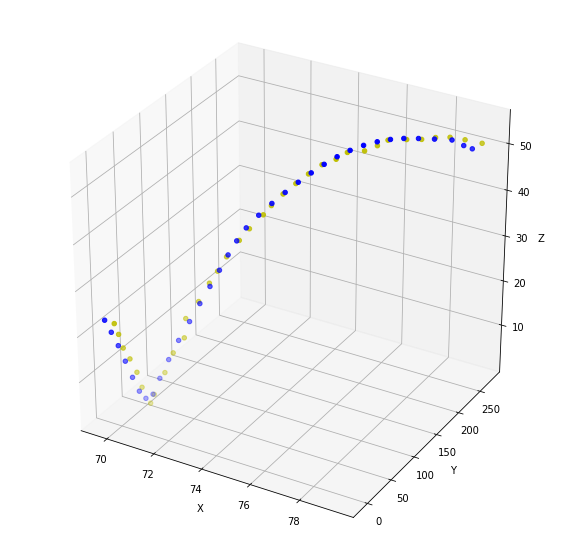

In [102]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_down1 = seq[4,:,:]
pred_down1 = pred[4,:,:]

act_down1_x = act_down1[:, 0]
act_down1_y = act_down1[:, 1]
act_down1_z = act_down1[:, 2]
ax.scatter(act_down1_x, act_down1_y, act_down1_z, c='y')

pred_down1_x = pred_down1[:,0]
pred_down1_y = pred_down1[:,1]
pred_down1_z = pred_down1[:,2]
ax.scatter(pred_down1_x, pred_down1_y, pred_down1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(0,0)
plt.show()

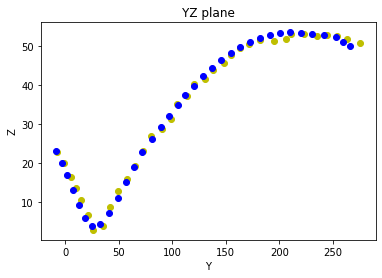

In [103]:
plt.plot(act_down1_y, act_down1_z, 'o', c='y')
plt.plot(pred_down1_y, pred_down1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

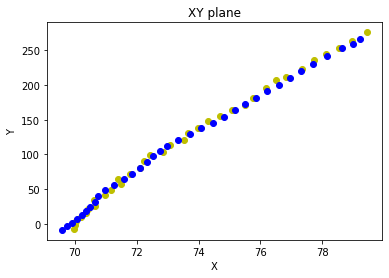

In [104]:
plt.plot(act_down1_x, act_down1_y, 'o', c='y')
plt.plot(pred_down1_x, pred_down1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

In [188]:
test_up = pd.read_csv('./trajectory/test_up.csv')
test_right = pd.read_csv('./trajectory/test_right.csv')
test_down = pd.read_csv('./trajectory/test_down.csv')

test_up = np.array(test_up)
test_right = np.array(test_right)
test_down = np.array(test_down)

test_up = test_up.reshape(1, len(test_up), 3)
test_right = test_right.reshape(1, len(test_right), 3)
test_down = test_down.reshape(1, len(test_down), 3)

nor_test_up = np.copy(test_up)
nor_test_right = np.copy(test_right)
nor_test_down = np.copy(test_down)

In [189]:
for j in range(35):
    nor_test_up[:,j,0] = (nor_test_up[:,j,0]-x_min)/(x_max-x_min)
    nor_test_up[:,j,1] = (nor_test_up[:,j,1]-y_min)/(y_max-y_min)
    nor_test_up[:,j,2] = (nor_test_up[:,j,2]-z_min)/(z_max-z_min)
    
    nor_test_right[:,j,0] = (nor_test_right[:,j,0]-x_min)/(x_max-x_min)
    nor_test_right[:,j,1] = (nor_test_right[:,j,1]-y_min)/(y_max-y_min)
    nor_test_right[:,j,2] = (nor_test_right[:,j,2]-z_min)/(z_max-z_min)
        
    nor_test_down[:,j,0] = (nor_test_down[:,j,0]-x_min)/(x_max-x_min)
    nor_test_down[:,j,1] = (nor_test_down[:,j,1]-y_min)/(y_max-y_min)
    nor_test_down[:,j,2] = (nor_test_down[:,j,2]-z_min)/(z_max-z_min)

In [190]:
nor_test_down

array([[[ 0.46195797,  0.99017881,  0.8719299 ],
        [ 0.44535165,  0.94757724,  0.88805921],
        [ 0.42360643,  0.93016989,  0.88137885],
        [ 0.4154658 ,  0.88300982,  0.89671212],
        [ 0.40148081,  0.8452457 ,  0.8992738 ],
        [ 0.38187968,  0.81604068,  0.89595291],
        [ 0.36327451,  0.78128722,  0.8928319 ],
        [ 0.34554427,  0.75310616,  0.87337995],
        [ 0.33506244,  0.71485898,  0.86596141],
        [ 0.31918926,  0.68350398,  0.84847149],
        [ 0.30452645,  0.64842393,  0.83480392],
        [ 0.29032704,  0.61945364,  0.8117593 ],
        [ 0.27786711,  0.58224743,  0.79339093],
        [ 0.26573917,  0.55093325,  0.7664468 ],
        [ 0.24939222,  0.5200307 ,  0.7298328 ],
        [ 0.23819454,  0.49437723,  0.68983303],
        [ 0.22414729,  0.46227041,  0.65835642],
        [ 0.214945  ,  0.43461664,  0.61714683],
        [ 0.2025819 ,  0.40426179,  0.57562337],
        [ 0.19031909,  0.3775636 ,  0.52322198],
        [ 0.18034561

In [191]:
nor_pred_up = model.predict(nor_test_up)
nor_pred_right = model.predict(nor_test_right)
nor_pred_down = model.predict(nor_test_down)

In [192]:
pred_test_up = np.copy(nor_pred_up)
pred_test_right = np.copy(nor_pred_right)
pred_test_down = np.copy(nor_pred_down)

for i in range(35):
    pred_test_up[:,i,0] = pred_test_up[:,i,0]*(x_max-x_min)+x_min
    pred_test_up[:,i,1] = pred_test_up[:,i,1]*(y_max-y_min)+y_min
    pred_test_up[:,i,2] = pred_test_up[:,i,2]*(z_max-z_min)+z_min
    
    pred_test_right[:,i,0] = pred_test_right[:,i,0]*(x_max-x_min)+x_min
    pred_test_right[:,i,1] = pred_test_right[:,i,1]*(y_max-y_min)+y_min
    pred_test_right[:,i,2] = pred_test_right[:,i,2]*(z_max-z_min)+z_min
    
    pred_test_down[:,i,0] = pred_test_down[:,i,0]*(x_max-x_min)+x_min
    pred_test_down[:,i,1] = pred_test_down[:,i,1]*(y_max-y_min)+y_min
    pred_test_down[:,i,2] = pred_test_down[:,i,2]*(z_max-z_min)+z_min

In [193]:
test_error_up = np.zeros((test_up.shape[0], test_up.shape[1], test_up.shape[2]))
test_error_right = np.zeros((test_up.shape[0], test_up.shape[1], test_up.shape[2]))
test_error_down = np.zeros((test_up.shape[0], test_up.shape[1], test_up.shape[2]))

for i in range(test_error_up.shape[1]):
    for j in range(test_error_up.shape[2]):
        test_error_up[:,i,j] = test_up[:,i,j]-pred_test_up[:,i,j]
        test_error_right[:,i,j] = test_right[:,i,j]-pred_test_right[:,i,j]
        test_error_down[:,i,j] = test_down[:,i,j]-pred_test_down[:,i,j]

In [195]:
test_error_up

array([[[  0.22989205, -15.85814282,  -3.07627432],
        [  0.70632535,  -8.7773313 ,  -1.473784  ],
        [  0.98371077,  -9.87024487,  -1.24685961],
        [  1.3463072 ,  -8.06618994,  -0.38616797],
        [  1.64982742,  -4.95258679,  -0.07124957],
        [  1.87978066,  -2.44964124,   0.19896904],
        [  2.08131383,  -2.1096521 ,   0.33530113],
        [  2.25550839,  -3.44104517,   0.74965101],
        [  2.25689741,   0.3407312 ,   0.17932945],
        [  2.22560237,   2.50648743,   0.11997188],
        [  2.48435945,   0.45851184,   1.01830283],
        [  2.61988075,   1.68650708,   1.27367358],
        [  2.49975585,   5.68965552,   1.05072554],
        [  2.71641852,   5.63910913,   1.18046622],
        [  2.97610527,   5.85214307,   1.22972649],
        [  2.99617941,   6.49821777,   1.08722639],
        [  3.06773381,   6.9287821 ,   1.09844662],
        [  3.11130874,   5.34198535,   1.79516052],
        [  3.02839626,   7.09249884,   1.66242471],
        [  2

## Test topspin

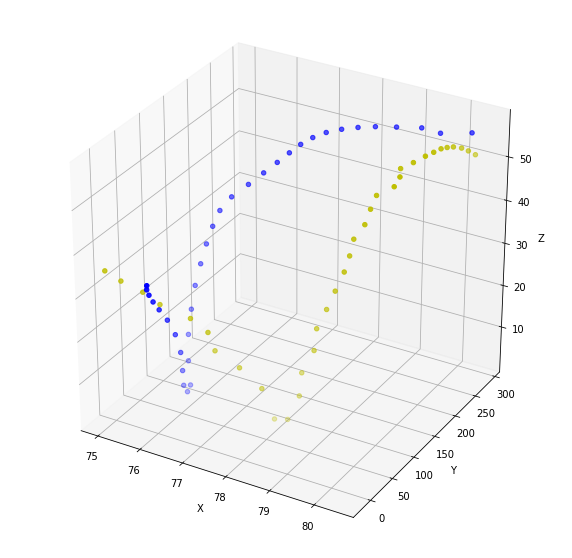

In [196]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_up1 = test_up[0,:,:]
pred_up1 = pred_test_up[0,:,:]

act_up1_x = act_up1[:, 0]
act_up1_y = act_up1[:, 1]
act_up1_z = act_up1[:, 2]
ax.scatter(act_up1_x, act_up1_y, act_up1_z, c='y')

pred_up1_x = pred_up1[:,0]
pred_up1_y = pred_up1[:,1]
pred_up1_z = pred_up1[:,2]
ax.scatter(pred_up1_x, pred_up1_y, pred_up1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(90,0)
plt.show()

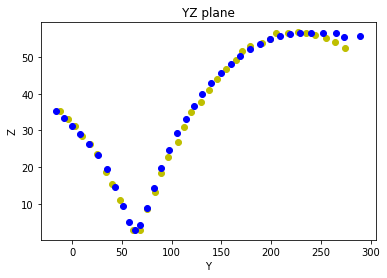

In [197]:
plt.plot(act_up1_y, act_up1_z, 'o', c='y')
plt.plot(pred_up1_y, pred_up1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

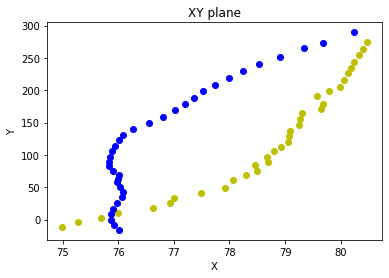

In [198]:
plt.plot(act_up1_x, act_up1_y, 'o', c='y')
plt.plot(pred_up1_x, pred_up1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

## rightspin

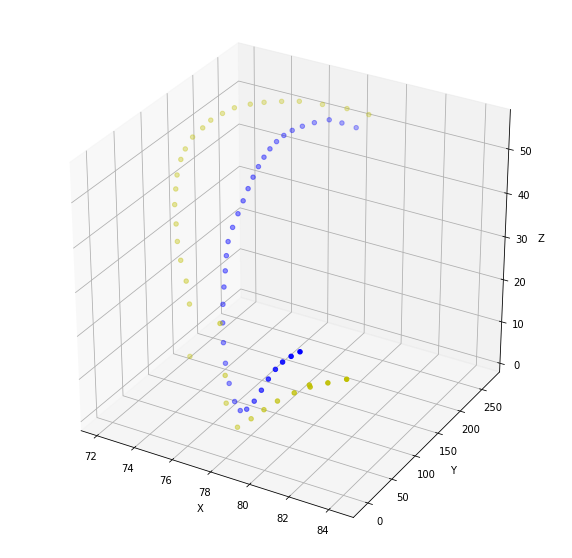

In [200]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_up1 = test_right[0,:,:]
pred_up1 = pred_test_right[0,:,:]

act_up1_x = act_up1[:, 0]
act_up1_y = act_up1[:, 1]
act_up1_z = act_up1[:, 2]
ax.scatter(act_up1_x, act_up1_y, act_up1_z, c='y')

pred_up1_x = pred_up1[:,0]
pred_up1_y = pred_up1[:,1]
pred_up1_z = pred_up1[:,2]
ax.scatter(pred_up1_x, pred_up1_y, pred_up1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(90,0)
plt.show()

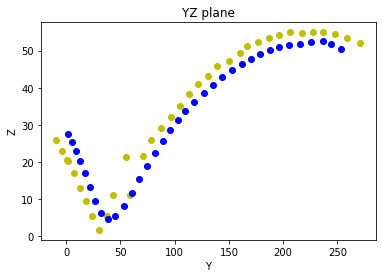

In [201]:
plt.plot(act_up1_y, act_up1_z, 'o', c='y')
plt.plot(pred_up1_y, pred_up1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

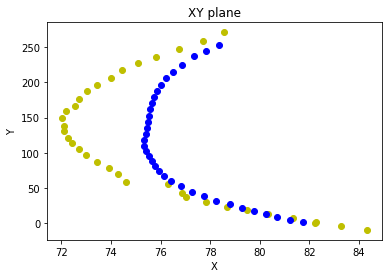

In [202]:
plt.plot(act_up1_x, act_up1_y, 'o', c='y')
plt.plot(pred_up1_x, pred_up1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()

## backspin

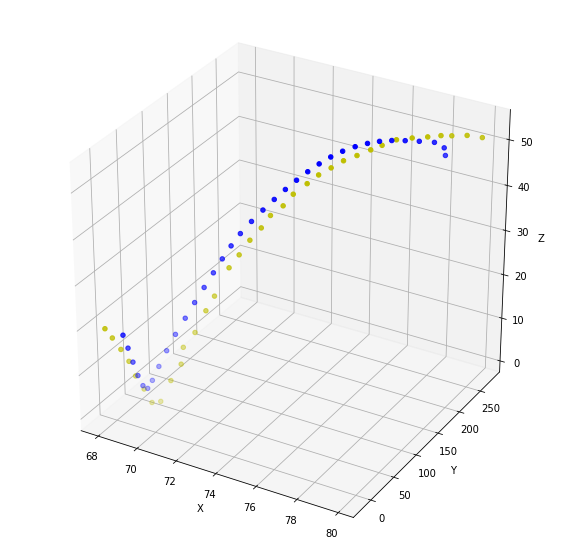

In [204]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

act_up1 = test_down[0,:,:]
pred_up1 = pred_test_down[0,:,:]

act_up1_x = act_up1[:, 0]
act_up1_y = act_up1[:, 1]
act_up1_z = act_up1[:, 2]
ax.scatter(act_up1_x, act_up1_y, act_up1_z, c='y')

pred_up1_x = pred_up1[:,0]
pred_up1_y = pred_up1[:,1]
pred_up1_z = pred_up1[:,2]
ax.scatter(pred_up1_x, pred_up1_y, pred_up1_z, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(90,0)
plt.show()

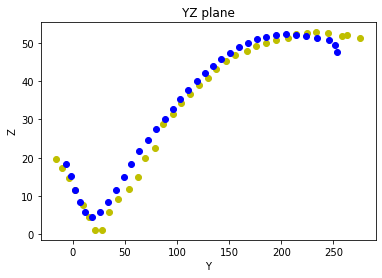

In [205]:
plt.plot(act_up1_y, act_up1_z, 'o', c='y')
plt.plot(pred_up1_y, pred_up1_z, 'o', c='b')

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('YZ plane')
plt.show()

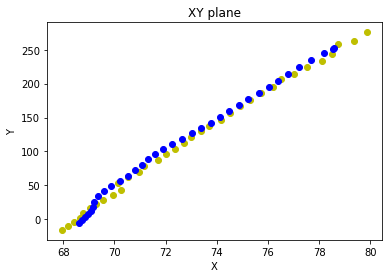

In [206]:
plt.plot(act_up1_x, act_up1_y, 'o', c='y')
plt.plot(pred_up1_x, pred_up1_y, 'o', c='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY plane')
plt.show()